### train a DecisionTree classifier along with evaluate and tune that to reach best accuracy  

In [40]:
from sklearn.datasets   import  load_breast_cancer
from sklearn.model_selection import  train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

In [41]:
cancer = load_breast_cancer()
X_data = cancer.data
Y_data = cancer.target
X_train , X_test ,Y_train , Y_test = train_test_split(X_data, Y_data, test_size= 0.3, random_state=1 , stratify=cancer.target )

# note that feature scaling is not a requirement for decision tree algorithms

tree_model = DecisionTreeClassifier( criterion='gini', max_depth=4,  random_state=1)
tree_model.fit(X_train , Y_train)


DecisionTreeClassifier(max_depth=4, random_state=1)

In [42]:
y_pred_test_data = tree_model.predict(X_test)
y_pred_train_data = tree_model.predict(X_train)

In [43]:
accuracy_train = accuracy_score(Y_train, y_pred_train_data)
print("accuracy score for train data is : {:.3f}".format(accuracy_train))

accuracy score for train data is : 0.985


In [44]:
accuracy_test = accuracy_score(Y_test, y_pred_test_data)
print("accuracy score for test data is : {:.3f}".format(accuracy_test))

accuracy score for test data is : 0.942


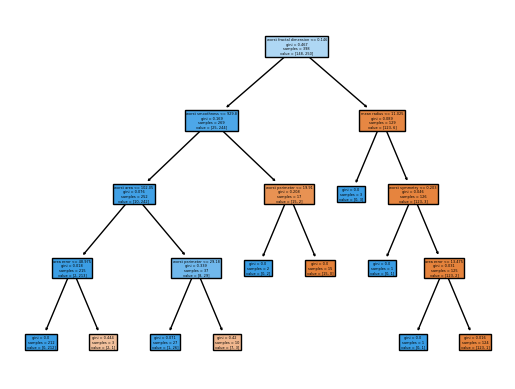

In [45]:
feature_names = ['mean radius' ,'mean texture' ,'mean perimeter', 'mean area' ,'mean smoothness' ,'mean compactness', 'mean concavity','mean concave points' ,'mean symmetry' ,'mean fractal dimension', 'radius error' ,'texture error' ,'perimeter error', 'area error' ,'smoothness error', 'compactness error' ,'concavity error'
'concave points error', 'symmetry error' ,'fractal dimension error','worst radius' ,'worst texture', 'worst perimeter', 'worst area', 'worst smoothness' ,'worst compactness' ,'worst concavity'
'worst concave points','worst symmetry' ,'worst fractal dimension']






tree.plot_tree(tree_model,   feature_names=feature_names,  filled=True)
plt.savefig('./DecisionTree_img/decision tree.png', dpi=300)
plt.show()

In [46]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    
    markers = ('o', 's')
    colors = ('red', 'blue')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples

    for idx, cl in enumerate(np.unique(y)):
            plt.scatter(x=X[y == cl, 0], 
                        y=X[y == cl, 1],
                        alpha=0.8, 
                        c=colors[idx],
                        marker=markers[idx], 
                        label=f'Class {cl}', 
                        edgecolor='black')

### Classify cancer dataset using random forest 

In [47]:
cancer = load_breast_cancer()
X_data = cancer.data
Y_data = cancer.target
X_train , X_test ,Y_train , Y_test = train_test_split(X_data[:,[23,26]], Y_data, test_size= 0.3, random_state=1 , stratify=cancer.target )

In [48]:
print(X_train.shape)
print(X_test.shape)

(398, 2)
(171, 2)


In [49]:
forest = RandomForestClassifier(n_estimators=4,  random_state=1, n_jobs=2)
forest.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=4, n_jobs=2, random_state=1)

In [50]:
y_pred_test_data = forest.predict(X_test)
y_pred_train_data = forest.predict(X_train)

In [51]:
accuracy_train = accuracy_score(Y_train, y_pred_train_data)
print("accuracy score for train data is : {:.3f}".format(accuracy_train))

accuracy score for train data is : 0.987


In [52]:
accuracy_test = accuracy_score(Y_test, y_pred_test_data)
print("accuracy score for test data is : {:.3f}".format(accuracy_test))

accuracy score for test data is : 0.924


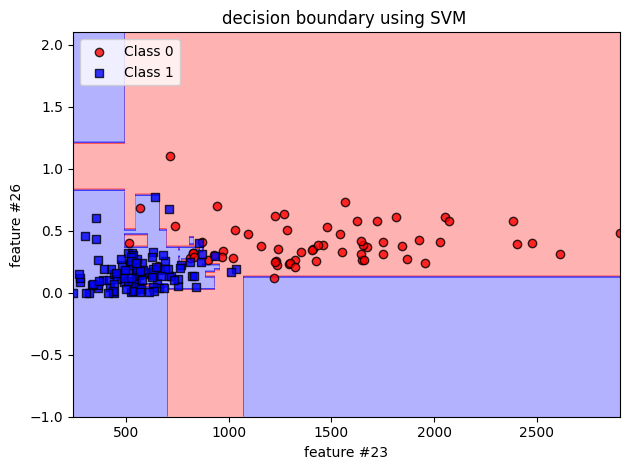

In [53]:
plot_decision_regions(X= X_test, y= Y_test, classifier= forest )
plt.title('decision boundary using SVM ')
plt.xlabel('feature #23')
plt.ylabel('feature #26')
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('./DecisionTree_img/decision boundary using random forest).png', dpi=300)
plt.show()